In [ ]:
!shred -u setup_colab.py
!wget "https://raw.githubusercontent.com/jpcano1/ISIS_4825_taller_3/master/setup_colab.py" -O setup_colab.py
import setup_colab as setup
setup.setup_workshop()

shred: setup_colab.py: failed to open for writing: No such file or directory
--2020-09-06 04:04:49--  https://raw.githubusercontent.com/jpcano1/ISIS_4825_taller_3/master/setup_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683 [text/plain]
Saving to: ‘setup_colab.py’

setup_colab.py      100%[===================>]     683  --.-KB/s    in 0s      

2020-09-06 04:04:50 (32.5 MB/s) - ‘setup_colab.py’ saved [683/683]

Workshop enabled successfully!


![image](https://docs.google.com/uc?export=download&id=15DUc09hFGqR8qcpYiN1OajRNaASmiL6d)

# **Scikit-image Bootcamp**

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jpcano1/ISIS_4825_taller_3/blob/master/bootcamp/Scikit_image_Bootcamp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

## **Contenido**
1. [**¿Qué es el color y cómo se representa?**](#id1)
2. [**Qué es una imagen y cómo se representa?**](#id2)
    - [**Cargar y visualizar una imagen en Scikit-Image**](#id2-1)
3. [**El histograma de una imagen**](#id3)
    - [**¿Cómo es un histograma de una imagen a color?**](#id3-1)
4. [**Binarización y Umbralización**](#id4)
    - [**Cómo recorrer una imagen**](#id4-1)
    - [**Binarizar a través de  `try_all_threshold` de scikit-image**](#id4-2)
    - [**Segmentación usando el método de la umbralización**](#id4-3)

## **¿Qué es el color y cómo se representa?**<a name="id1"></a>
- El color es una percepción visual que se presenta en el cerebro de los humanos gracias a los fotorreceptores oculares.
- Existen varios modelos para representar las distintos colores, entre ellos los más populares son RGB y CYMK.
- RGB $\to$ Colores en términos de intensidad de Rojo, Verde o Azul
- CYM $\to$ Colores en términos de los pigmentos del Cián, Amarillo y Magenta:

$$\begin{bmatrix} C\\[0.3em] M\\[0.3em] Y
   \end{bmatrix} = \begin{bmatrix} 1\\[0.3em] 1\\[0.3em] 1 
                   \end{bmatrix} - \begin{bmatrix}R\\[0.3em] G\\[0.3em] B\end{bmatrix}$$

## **¿Qué es una imagen y cómo se representa?**<a name="id2"></a>
- Una imagen es una representación visual compuesta por colores.
- Se representa como un conjunto de matrices de tamaño $M \times N$ donde, dependiendo el modelo, una imagen representará un canal de color y cada matriz estará compuesta por números entre 0 y 1 o entre 0 y 255, la mayoría de las veces.
![image](https://www.sketchpad.net/images/channelsrgb.gif)
> Imagen tomada de [Scketch pad](https://www.sketchpad.net/)

### **Cargar y visualizar una imagen en Scikit-Image**<a name="id2-1"></a>

In [ ]:
import utils.visualization as vis
from skimage.filters import try_all_threshold

from skimage import io
from skimage import color

import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: ignored

In [ ]:
url = "https://github.com/PacktPublishing/Python-Image-Processing-Cookbook/blob/master/Chapter%2004/images/lotus.png?raw=true"

In [ ]:
vis.download_image(url)

In [ ]:
img = io.imread("image.jpg")

In [ ]:
img.shape

(480, 720, 3)

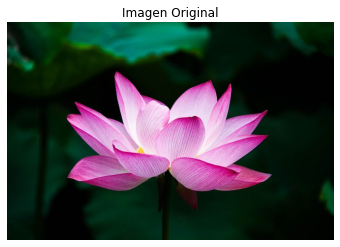

In [ ]:
vis.visualize(img, "Imagen Original")

In [ ]:
img_red = img[:, :, 0]
img_green = img[:, :, 1]
img_blue = img[:, :, 2]

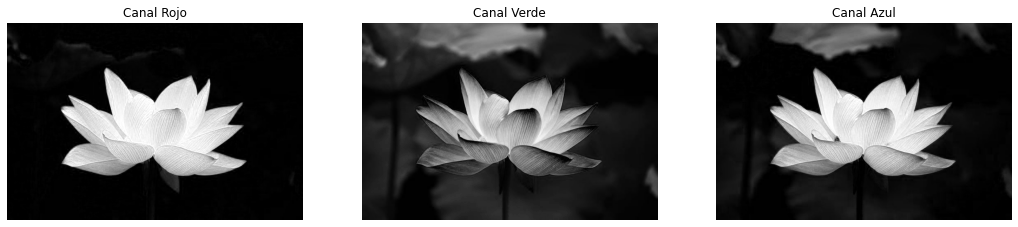

In [ ]:
vis.visualize_subplot([img_red, img_green, img_blue], 
                      ["Canal Rojo", "Canal Verde", "Canal Azul"], (1, 3), figsize=(18, 6))

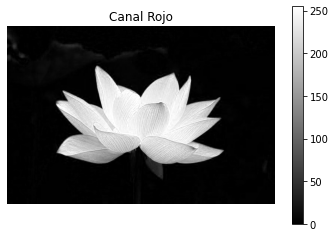

In [ ]:
vis.visualize(img_red, "Canal Rojo")
plt.colorbar();

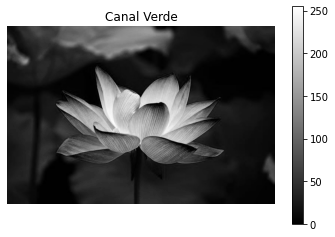

In [ ]:
vis.visualize(img_green, "Canal Verde")
plt.colorbar();

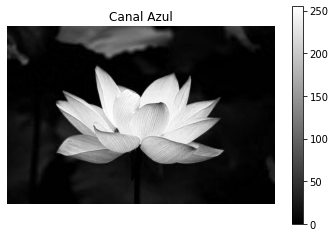

In [ ]:
vis.visualize(img_blue, "Canal Azul")
plt.colorbar();

## **El histograma de una imagen**<a name="id3"></a>
- Representación gráfica de la distribución de las intensidades de las tonalidades de los canales de la imagen.
### **¿Cómo es un histograma de una imagen a color?**<a name="id3-1"></a>

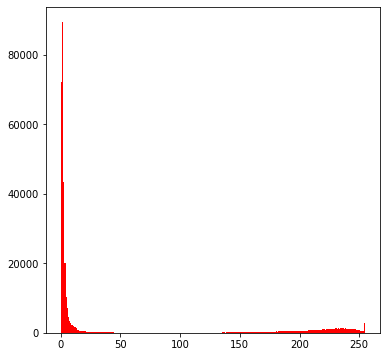

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(img_red.ravel(), bins=256, color="r")
plt.show()

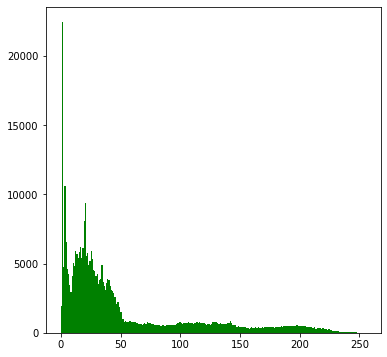

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(img_green.ravel(), bins=256, color="g")
plt.show()

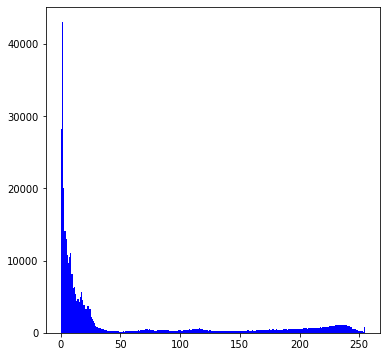

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(img_blue.ravel(), bins=256, color="b")
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(img_red.ravel(), bins=256, alpha=0.4, color="r")
plt.hist(img_green.ravel(), bins=256, alpha=0.4, color="g")
plt.hist(img_blue.ravel(), bins=256, alpha=0.4, color="b")
plt.show()

NameError: ignored

## **Binarización y Umbralización**<a name="id4"></a>
- Binarizar es el arte de normalizar todos los píxeles de una imagen en términos de unos y ceros, de True y False.

![image](https://felixniklas.com/imageprocessing/content/01-binarization/binarization.png)

> Imagen tomada de [Felix Niklas](https://felixniklas.com/)

- Umbralizar es el arte de binarizar una imagen dado un umbral numérico.
### **Cómo recorrer una imagen**<a name="id4-1"></a>
- Apliquemos el concepto de umbralización a una imagen pixel por pixel

In [ ]:
img_gray = color.rgb2gray(img)

### **Binarizar a través de  `try_all_threshold` de scikit-image**<a name="id4-2"></a>

In [ ]:
try_all_threshold(img_gray, verbose=0, figsize=(12, 24))
plt.show();

NameError: ignored

### **Segmentación usando el método de la umbralización**<a name="id4-3"></a>
- Segmentar es dividir una imagen en distintas partes u grupos de píxeles.

In [ ]:
def binarize(img_gray, thresh):
    binarized_img = np.zeros_like(img_gray, dtype=np.uint8)

    for i in range(img_gray.shape[0]):
        for j in range(img_gray.shape[1]):
            if img_gray[i, j] > thresh:
                mask = 1
            else:
                mask = 0
            binarized_img[i, j] = mask
    return binarized_img

In [9]:
thresh = threshold_otsu(img_gray)
binarized_img = binarize(img_gray, thresh)

NameError: ignored

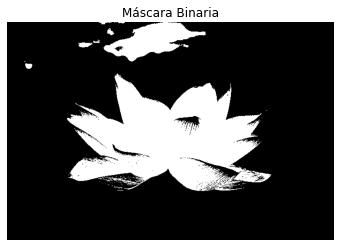

In [ ]:
vis.visualize(binarized_img, "Máscara Binaria")

In [ ]:
segmented_img = img_gray * binarized_img

In [ ]:
vis.visualize(segmented_img, "Imagen Segmentada")

NameError: ignored

In [ ]:
binarized_img_3 = np.zeros_like(img)
binarized_img_3[..., 0] = binarized_img
binarized_img_3[..., 1] = binarized_img
binarized_img_3[..., 2] = binarized_img

In [ ]:
segmented_img_3 = binarized_img_3 * img

In [ ]:
vis.visualize(segmented_img_3, "Imagen Segmentada en RGB")

NameError: ignored